# Credit Score ML

# Imports

In [1]:
# DF
import pandas as pd
import dataframe_image as dfi
import numpy as np
# viz
import seaborn as sns
import matplotlib.pyplot as plt
# ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Other
import warnings



# Settings

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings("ignore")

# Functions

# Data

In [3]:
df = pd.read_csv("train.csv")

## Inspect

In [4]:
df

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      19114.12            1824.843333                  3   
1      Scientist      19114.12                    NaN                  3   
2      Scientist      19114.12                    NaN                  3   
3      Scientist      19114.12                    NaN                  3   
4      Scientist      19114.12            1824.843333                  3   
...          ...           ...                    ...                ...   
99995   Mechanic      39628.99            3359.415833                  4   
99996   Mechanic      39628.99            3359.415833                  4   
99997   Mechanic      39628.99            3359.415833                  4   
99998   Mechanic      39628.99            3359.415833                  4   
99999   Mechanic     39628.99_            3359.415833                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    4              3           4   
1                    4              3           4   
2                    4              3           4   
3                    4              3           4   
4                    4              3           4   
...                ...            ...         ...   
99995                6              7           2   
99996                6              7           2   
99997                6           5729           2   
99998                6              7           2   
99999                6              7           2   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                          7                11.27                   4.0   
1                        NaN                11.27                   4.0   
2                          7                    _                   4.0   
3                          4                 6.27                   4.0   
4                        NaN                11.27                   4.0   
...                      ...                  ...                   ...   
99995                      7                 11.5                   3.0   


In [5]:
df.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [6]:
df.describe(include="O")

ID Customer_ID    Month    Name     Age        SSN Occupation  \
count   100000      100000   100000   90015  100000     100000     100000   
unique  100000       12500        8   10139    1788      12501         16   
top     0x1602   CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq         1           8    12500      44    2833       5572       7062   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                100000     100000           100000   
unique                 4384          4            13178   
top                       _   Standard          1360.45   
freq                   2091      36479               24   

            Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
count                    90970                100000                   95521   
unique                     404                     3                   91049   
top     15 Years and 11 Months                   Yes               __10000__   
freq                       446                 52326                    4305   

                     Payment_Behaviour                   Monthly_Balance  \
count                           100000                             98800   
unique                               7                             98792   
top     Low_spent_Small_value_payments  __-333333333333333333333333333__   
freq                             25513                                 9   

       Credit_Score  
count        100000  
unique            3  
top        Standard  
freq          53174

In [7]:
for col in df.select_dtypes("number").columns:
    print(f"{col}\nlargest\n {df[col].nlargest(20)}\n")
    print(f"{col}\nsmallest\n {df[col].nsmallest(20)}\n")

Monthly_Inhand_Salary
largest
 62728    15204.633333
62729    15204.633333
62730    15204.633333
62731    15204.633333
62732    15204.633333
62734    15204.633333
62735    15204.633333
94288    15167.180000
94289    15167.180000
94290    15167.180000
94291    15167.180000
94292    15167.180000
94293    15167.180000
94294    15167.180000
94295    15167.180000
31808    15136.696667
31809    15136.696667
31811    15136.696667
31812    15136.696667
31813    15136.696667
Name: Monthly_Inhand_Salary, dtype: float64

Monthly_Inhand_Salary
smallest
 83640    303.645417
83641    303.645417
83642    303.645417
83643    303.645417
83644    303.645417
83645    303.645417
83646    303.645417
83647    303.645417
41416    319.556250
41418    319.556250
41419    319.556250
41420    319.556250
41421    319.556250
41422    319.556250
41423    319.556250
33232    332.128333
33233    332.128333
33234    332.128333
33235    332.128333
33236    332.128333
Name: Monthly_Inhand_Salary, dtype: float64

Num_Ban

## Clean

### Replace errors with NaN

In [8]:
df.replace('_', np.nan, inplace=True)
df.replace("!@9#%8", np.nan, inplace=True)
df.replace("#F%$D@*&8", np.nan, inplace=True)
df.replace("_______", np.nan, inplace=True)
df.replace("__10000__", np.nan, inplace=True)
df.replace("__-333333333333333333333333333__", np.nan, inplace=True)


In [9]:
df.describe(include="O")

ID Customer_ID    Month    Name     Age          SSN Occupation  \
count   100000      100000   100000   90015  100000        94428      92938   
unique  100000       12500        8   10139    1788        12500         15   
top     0x1602   CUS_0xd40  January  Langep      38  078-73-5990     Lawyer   
freq         1           8    12500      44    2833            8       6575   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                 97909      79805           100000   
unique                 4383          3            13178   
top                    8.22   Standard          1360.45   
freq                    133      36479               24   

            Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
count                    90970                100000                   91216   
unique                     404                     3                   91048   
top     15 Years and 11 Months                   Yes                     0.0   
freq                       446                 52326                     169   

                     Payment_Behaviour     Monthly_Balance Credit_Score  
count                            92400               98791       100000  
unique                               6               98791            3  
top     Low_spent_Small_value_payments  312.49408867943663     Standard  
freq                             25513                   1        53174

### Fix num columns (and change dtypes) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [11]:
# Remove symbols and change into numbers
df.Age = df.Age.str.replace(r"[^\d\.]*","").astype(int)
df.Annual_Income = df.Annual_Income.str.replace(r"[^\d\.]*","").astype(float)
df.Num_of_Loan = df.Num_of_Loan.str.replace(r"[^\d\.]*","").astype(int, errors="ignore")
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.str.replace(r"[^\d\.]*","").astype(float)
df.Changed_Credit_Limit = df.Changed_Credit_Limit.str.replace(r"[^\d\.]*","").astype(float)
df.Outstanding_Debt = df.Outstanding_Debt.str.replace(r"[^\d\.]*","").astype(float)
df.Amount_invested_monthly = df.Amount_invested_monthly.str.replace(r"[^\d\.]*","").astype(float)
df.Monthly_Balance = df.Monthly_Balance.str.replace(r"[^\d\.]*","").astype(float)

In [12]:
# Change Credit_History_Age from string to float
lst = []
for i in df.Credit_History_Age.str.split():
    try:
        lst.append(round(float(i[0])+float(i[3])/12, 2))
    except:
        lst.append(np.nan)
df.Credit_History_Age = lst
df.Credit_History_Age = df.Credit_History_Age.astype(float)

In [13]:
# Fix Type_of_Loan col
df.Type_of_Loan = df.Type_of_Loan.str.replace(",.*$", "")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int32  
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              88592 non-null   ob

### Outliers

In [15]:
df.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000   1.000000e+05           84998.000000      100000.000000   
mean      119.509700   1.764157e+05            4194.170850          17.091280   
std       684.757313   1.429618e+06            3183.686167         117.404834   
min        14.000000   7.005930e+03             303.645417          -1.000000   
25%        25.000000   1.945750e+04            1625.568229           3.000000   
50%        34.000000   3.757861e+04            3093.745000           6.000000   
75%        42.000000   7.279092e+04            5957.448333           7.000000   
max      8698.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count     100000.00000  100000.000000  100000.000000        100000.000000   
mean          22.47443      72.466040      10.761960            21.068780   
std          129.05741     466.422621      61.789933            14.860104   
min            0.00000       1.000000       0.000000            -5.000000   
25%            4.00000       8.000000       2.000000            10.000000   
50%            5.00000      13.000000       3.000000            18.000000   
75%            7.00000      20.000000       6.000000            28.000000   
max         1499.00000    5797.000000    1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            92998.000000          97909.000000          98035.000000   
mean                30.946268             10.465678             27.754251   
std                226.028754              6.670732            193.177339   
min                  0.000000              0.000000              0.000000   
25%                  9.000000              5.350000              3.000000   
50%                 14.000000              9.400000              6.000000   
75%                 18.000000             14.870000              9.000000   
max               4397.000000             36.970000           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000        90970.000000   
mean        1426.220376                 32.285173           18.433032   
std         1155.129026                  5.116875            8.311783   
min            0.230000                 20.000000            0.080000   
25%          566.072500                 28.052567           12.000000   
50%         1166.155000                 32.305784           18.250000   
75%         1945.962500                 36.496663           25.170000   
max         4998.070000                 50.000000           33.670000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000             91216.000000     97123.000000  
mean           1403.118217               195.539456       402.164483  
std            8306.041270               199.564527       213.644217  
min               0.000000                 0.000000         0.007760  
25%              30.306660                72.236692       269.998334  
50%              69.249473               128.954538       336.472111  
75%             161.224249               236.815814       469.652004  
max           82331.000000              1977.326102      1602.040519

In [16]:
for col in df.select_dtypes("number").columns:
    print(f"{col}\nlargest\n {df[col].nlargest(20)}\n")
    print(f"{col}\nsmallest\n {df[col].nsmallest(20)}\n")
    

Age
largest
 71732    8698
82739    8697
35557    8682
82335    8678
13372    8674
25095    8669
71542    8666
36575    8663
11190    8662
6005     8655
94475    8643
84621    8640
18578    8639
22612    8639
17916    8632
10431    8628
34967    8623
66662    8616
84261    8616
10438    8608
Name: Age, dtype: int32

Age
smallest
 408     14
409     14
410     14
411     14
412     14
413     14
414     14
415     14
1008    14
1009    14
1010    14
1752    14
1753    14
1754    14
1755    14
1784    14
1785    14
1786    14
1787    14
1788    14
Name: Age, dtype: int32

Annual_Income
largest
 48302    24198062.0
7814     24188807.0
59059    24177153.0
14588    24160009.0
27262    24105369.0
39829    24105151.0
12307    24096975.0
85379    24065688.0
61389    24008957.0
81585    23942655.0
87771    23917742.0
79474    23912939.0
77259    23884555.0
39795    23871966.0
25759    23834698.0
48602    23822065.0
53425    23784659.0
8059     23775314.0
12492    23743065.0
85559    23713472.0


       - Age, high
       - Num_Bank_Accounts, high & low
       - Num_Credit_Card, high
       - Interest_Rate, high
       - Num_of_Loan, high
       - Num_of_Delayed_Payment, high
       - Total_EMI_per_month, high

#### Age

In [17]:
df.Age.nlargest(2782)

71732    8698
82739    8697
35557    8682
82335    8678
13372    8674
         ... 
28718      99
38248      95
65420      95
78564      95
726        56
Name: Age, Length: 2782, dtype: int32

In [18]:
df.Age.nsmallest(5)

408    14
409    14
410    14
411    14
412    14
Name: Age, dtype: int32

In [19]:
df.loc[df.Age > 90]

ID Customer_ID     Month              Name   Age          SSN  \
2       0x1604   CUS_0xd40     March     Aaron Maashoh   500  821-00-0265   
56      0x1656  CUS_0x5407   January              Annk  7580  500-92-6408   
113     0x16ab   CUS_0xff4  February               NaN   500  655-05-7666   
122     0x16b8  CUS_0x33d2     March         Chalmersa   181  965-46-2491   
219     0x1749  CUS_0x3edc     April         Williamso   995  663-16-3845   
...        ...         ...       ...               ...   ...          ...   
99913  0x25f6f  CUS_0x1619  February       Phil Wahbao  2263  683-59-7399   
99937  0x25f93  CUS_0xad4f  February  Sabina Zawadzkig   500  226-45-0652   
99950  0x25fa4  CUS_0x51b3      July             Ryana  1342  837-85-9800   
99963  0x25fb9  CUS_0x372c     April   Lucia Mutikanik   500  340-85-7301   
99972  0x25fc6   CUS_0xf16       May    Maria Sheahanb  1753  868-70-2218   

          Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
2          Scientist       19114.12                    NaN                  3   
56     Media_Manager       34081.38                    NaN                  8   
113     Entrepreneur       25546.26                    NaN                  8   
122        Scientist       31993.78            2942.148333                  6   
219       Accountant       43070.24            3622.186667                  3   
...              ...            ...                    ...                ...   
99913  Media_Manager       20059.98            1523.665000                  8   
99937            NaN       22620.79            1722.065833                  7   
99950  Media_Manager       59146.36            4908.863333                  3   
99963         Lawyer       42903.79                    NaN                  0   
99972  Media_Manager       16680.35            1528.029167                  1   

       Num_Credit_Card  Interest_Rate  Num_of_Loan             Type_of_Loan  \
2                    4              3            4                Auto Loan   
56                   7             15            3            Not Specified   
113                  7             14            5            Not Specified   
122                  6              7            2              Payday Loan   
219                  3             18            1  Debt Consolidation Loan   
...                ...            ...          ...                      ...   
99913                5             12            4         Home Equity Loan   
99937                3              9            0                      NaN   
99950                6              6            1            Personal Loan   
99963                4              6            1            Not Specified   
99972                1              5            4              Payday Loan   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
2                        3                     7.0                   NaN   
56                      30                    11.0                 17.13   
113                     16                    13.0                  7.83   
122                      8                    14.0                 10.28   
219                     11                     8.0                  8.97   
...                    ...                     ...                   ...   
99913                   25                    11.0                  2.97   
99937                   25                     NaN                  5.31   
99950                    8                     6.0                  6.68   
99963                   14                     0.0                  5.10   
99972                    1                     0.0                  5.69   

       Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
2                       4.0       Good            809.98   
56                      5.0   Standard           1704.18   
113                     NaN   Standard            758.44   
122         

In [20]:
# Change outliers to nan and fill from row with same Customer_ID
for i in range(len(df)):
    if df.loc[i]["Age"] > 90:
        df.at[i,"Age"] = np.nan
df["Age"] = df.groupby(["Customer_ID"])['Age'].fillna(
                                                method="bfill").fillna(method="ffill")

In [21]:
df.loc[df.Age > 90]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

#### Num_Bank_Accounts

In [22]:
df.head(500)

ID Customer_ID     Month                  Name   Age          SSN  \
0    0x1602   CUS_0xd40   January         Aaron Maashoh  23.0  821-00-0265   
1    0x1603   CUS_0xd40  February         Aaron Maashoh  23.0  821-00-0265   
2    0x1604   CUS_0xd40     March         Aaron Maashoh  23.0  821-00-0265   
3    0x1605   CUS_0xd40     April         Aaron Maashoh  23.0  821-00-0265   
4    0x1606   CUS_0xd40       May         Aaron Maashoh  23.0  821-00-0265   
5    0x1607   CUS_0xd40      June         Aaron Maashoh  23.0  821-00-0265   
6    0x1608   CUS_0xd40      July         Aaron Maashoh  23.0  821-00-0265   
7    0x1609   CUS_0xd40    August                   NaN  23.0          NaN   
8    0x160e  CUS_0x21b1   January       Rick Rothackerj  28.0  004-07-5839   
9    0x160f  CUS_0x21b1  February       Rick Rothackerj  28.0  004-07-5839   
10   0x1610  CUS_0x21b1     March       Rick Rothackerj  28.0  004-07-5839   
11   0x1611  CUS_0x21b1     April       Rick Rothackerj  28.0  004-07-5839   
12   0x1612  CUS_0x21b1       May       Rick Rothackerj  28.0  004-07-5839   
13   0x1613  CUS_0x21b1      June       Rick Rothackerj  28.0  004-07-5839   
14   0x1614  CUS_0x21b1      July       Rick Rothackerj  28.0  004-07-5839   
15   0x1615  CUS_0x21b1    August       Rick Rothackerj  28.0  004-07-5839   
16   0x161a  CUS_0x2dbc   January                Langep  34.0  486-85-3974   
17   0x161b  CUS_0x2dbc  February                   NaN  34.0  486-85-3974   
18   0x161c  CUS_0x2dbc     March                Langep  34.0  486-85-3974   
19   0x161d  CUS_0x2dbc     April                Langep  34.0  486-85-3974   
20   0x161e  CUS_0x2dbc       May                Langep  34.0  486-85-3974   
21   0x161f  CUS_0x2dbc      June                Langep  34.0  486-85-3974   
22   0x1620  CUS_0x2dbc      July                   NaN  34.0  486-85-3974   
23   0x1621  CUS_0x2dbc    August                Langep  34.0  486-85-3974   
24   0x1626  CUS_0xb891   January                Jasond  54.0  072-31-6145   
25   0x1627  CUS_0xb891  February                Jasond  54.0  072-31-6145   
26   0x1628  CUS_0xb891     March                Jasond  55.0  072-31-6145   
27   0x1629  CUS_0xb891     April                Jasond  55.0  072-31-6145   
28   0x162a  CUS_0xb891       May                Jasond  55.0  072-31-6145   
29   0x162b  CUS_0xb891      June                Jasond  55.0          NaN   
30   0x162c  CUS_0xb891      July                Jasond  55.0  072-31-6145   
31   0x162d  CUS_0xb891    August                Jasond  55.0  072-31-6145   
32   0x1632  CUS_0x1cdb   January                Deepaa  21.0  615-06-7821   
33   0x1633  CUS_0x1cdb  February                Deepaa  21.0  615-06-7821   
34   0x1634  CUS_0x1cdb     March                Deepaa  21.0  615-06-7821   
35   0x1635  CUS_0x1cdb     April                Deepaa  21.0  615-06-7821   
36   0x1636  CUS_0x1cdb       May                Deepaa  21.0  615-06-7821   
37   0x1637  CUS_0x1cdb      June                Deepaa  21.0  615-06-7821   
38   0x1638  CUS_0x1cdb      July                Deepaa  21.0  615-06-7821   
39   0x1639  CUS_0x1cdb    August                Deepaa  21.0  615-06-7821   
40   0x163e  CUS_0x95ee   January                    Np  31.0  612-70-8987   
41   0x163f  CUS_0x95ee  February                    Np  31.0  612-70-8987   
42   0x1640  CUS_0x95ee     March                    Np  31.0  612-70-8987   
43   0x1641  CUS_0x95ee     April                    Np  31.0  612-70-8987   
44   0x1642  CUS_0x95ee       May                    Np  31.0  612-70-8987   
45   0x1643  CUS_0x95ee      June                    Np  31.0  612-70-8987   
46   0x1644  CUS_0x95ee      July                    Np  31.0  612-70-8987   
47   0x1645  CUS_0x95ee    August                    Np  31.0  612-70-8987   
48   0x164a  CUS_0x284a   January                Nadiaq  33.0  411-51-0676   
49   0x164b  CUS_0x284a  February                Nadiaq  34.0  411-51-0676   
50   0x164c  CUS_0x284a     Mar

In [23]:
df.loc[df["Num_Bank_Accounts"] > 15]

ID Customer_ID    Month             Name   Age          SSN  \
267     0x1791  CUS_0x4004    April          Carlosj  44.0  679-26-6464   
288     0x17b2  CUS_0x4080  January        ra Alperx  16.0  995-37-8920   
310     0x17d0  CUS_0x42ac     July        Lawrencea  37.0  700-60-3660   
339     0x17fd  CUS_0x9bc1    April     Jaisinghanij  42.0  445-18-4420   
356     0x1816  CUS_0xaedb      May     Olivia Oranr  19.0  272-47-1135   
...        ...         ...      ...              ...   ...          ...   
99591  0x25d89   CUS_0x544   August  Jon Herskovitzu  29.0  163-45-1172   
99638  0x25dd0  CUS_0x296f     July  David Millikenh  25.0  972-13-0672   
99666  0x25dfc   CUS_0xb09    March           Lianau  31.0  228-47-4867   
99722  0x25e50  CUS_0x11c7    March   raden Reddallh  53.0  646-19-1493   
99916  0x25f72  CUS_0x1619      May      Phil Wahbao  54.0  683-59-7399   

          Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
267           Writer       58317.00                    NaN               1414   
288         Mechanic       29469.98            2227.831667               1231   
310         Musician       15566.02            1423.168333                 67   
339              NaN       20574.47                    NaN                572   
356         Musician       85554.03            7185.502500               1488   
...              ...            ...                    ...                ...   
99591       Mechanic       17013.29            1326.774167                813   
99638      Developer      125271.96           10374.330000               1481   
99666         Lawyer      146310.68           12124.556667                474   
99722      Architect       36817.94            3198.161667                697   
99916  Media_Manager       20059.98            1523.665000                182   

       Num_Credit_Card  Interest_Rate  Num_of_Loan             Type_of_Loan  \
267                  5              9            6            Mortgage Loan   
288                  7             24            5            Personal Loan   
310                  5             32            4         Home Equity Loan   
339                  3             14            4      Credit-Builder Loan   
356                  2              3          100                      NaN   
...                ...            ...          ...                      ...   
99591                1             10            1  Debt Consolidation Loan   
99638                7              1            4            Mortgage Loan   
99666                4              9            1  Debt Consolidation Loan   
99722                4              5            3         Home Equity Loan   
99916                5             12            4         Home Equity Loan   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
267                     18                    23.0                 23.58   
288                     53                    21.0                 26.94   
310                     12                    17.0                 11.24   
339                      6                    12.0                  6.74   
356                     14                     NaN                  6.43   
...                    ...                     ...                   ...   
99591                    6                     1.0                 11.93   
99638                   10                    10.0                  6.44   
99666                    3                     7.0                 11.48   
99722                    7                     6.0                  3.98   
99916                   25                    11.0                  2.97   

       Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
267                    10.0   Standard             98.97   
288                    11.0        NaN           3421.66   
310                     9.0   Standard           1693.95   
339                    11.0   Standa

In [24]:
# Change outliers to nan and fill from row with same Customer_ID
for i in range(len(df)):
    if df.loc[i]["Num_Bank_Accounts"] > 15:
        df.at[i,"Num_Bank_Accounts"] = np.nan
df["Num_Bank_Accounts"] = df.groupby(["Customer_ID"])['Num_Bank_Accounts'].fillna(
                                                method="bfill").fillna(method="ffill")

In [25]:
# Change outliers to nan and fill from row with same Customer_ID
for i in range(len(df)):
    if df.loc[i]["Num_Bank_Accounts"] < 0:
        df.at[i,"Num_Bank_Accounts"] = np.nan
df["Num_Bank_Accounts"] = df.groupby(["Customer_ID"])['Num_Bank_Accounts'].fillna(
                                                method="bfill").fillna(method="ffill")

#### Num_Credit_Card

In [26]:
df.head(500)

ID Customer_ID     Month                  Name   Age          SSN  \
0    0x1602   CUS_0xd40   January         Aaron Maashoh  23.0  821-00-0265   
1    0x1603   CUS_0xd40  February         Aaron Maashoh  23.0  821-00-0265   
2    0x1604   CUS_0xd40     March         Aaron Maashoh  23.0  821-00-0265   
3    0x1605   CUS_0xd40     April         Aaron Maashoh  23.0  821-00-0265   
4    0x1606   CUS_0xd40       May         Aaron Maashoh  23.0  821-00-0265   
5    0x1607   CUS_0xd40      June         Aaron Maashoh  23.0  821-00-0265   
6    0x1608   CUS_0xd40      July         Aaron Maashoh  23.0  821-00-0265   
7    0x1609   CUS_0xd40    August                   NaN  23.0          NaN   
8    0x160e  CUS_0x21b1   January       Rick Rothackerj  28.0  004-07-5839   
9    0x160f  CUS_0x21b1  February       Rick Rothackerj  28.0  004-07-5839   
10   0x1610  CUS_0x21b1     March       Rick Rothackerj  28.0  004-07-5839   
11   0x1611  CUS_0x21b1     April       Rick Rothackerj  28.0  004-07-5839   
12   0x1612  CUS_0x21b1       May       Rick Rothackerj  28.0  004-07-5839   
13   0x1613  CUS_0x21b1      June       Rick Rothackerj  28.0  004-07-5839   
14   0x1614  CUS_0x21b1      July       Rick Rothackerj  28.0  004-07-5839   
15   0x1615  CUS_0x21b1    August       Rick Rothackerj  28.0  004-07-5839   
16   0x161a  CUS_0x2dbc   January                Langep  34.0  486-85-3974   
17   0x161b  CUS_0x2dbc  February                   NaN  34.0  486-85-3974   
18   0x161c  CUS_0x2dbc     March                Langep  34.0  486-85-3974   
19   0x161d  CUS_0x2dbc     April                Langep  34.0  486-85-3974   
20   0x161e  CUS_0x2dbc       May                Langep  34.0  486-85-3974   
21   0x161f  CUS_0x2dbc      June                Langep  34.0  486-85-3974   
22   0x1620  CUS_0x2dbc      July                   NaN  34.0  486-85-3974   
23   0x1621  CUS_0x2dbc    August                Langep  34.0  486-85-3974   
24   0x1626  CUS_0xb891   January                Jasond  54.0  072-31-6145   
25   0x1627  CUS_0xb891  February                Jasond  54.0  072-31-6145   
26   0x1628  CUS_0xb891     March                Jasond  55.0  072-31-6145   
27   0x1629  CUS_0xb891     April                Jasond  55.0  072-31-6145   
28   0x162a  CUS_0xb891       May                Jasond  55.0  072-31-6145   
29   0x162b  CUS_0xb891      June                Jasond  55.0          NaN   
30   0x162c  CUS_0xb891      July                Jasond  55.0  072-31-6145   
31   0x162d  CUS_0xb891    August                Jasond  55.0  072-31-6145   
32   0x1632  CUS_0x1cdb   January                Deepaa  21.0  615-06-7821   
33   0x1633  CUS_0x1cdb  February                Deepaa  21.0  615-06-7821   
34   0x1634  CUS_0x1cdb     March                Deepaa  21.0  615-06-7821   
35   0x1635  CUS_0x1cdb     April                Deepaa  21.0  615-06-7821   
36   0x1636  CUS_0x1cdb       May                Deepaa  21.0  615-06-7821   
37   0x1637  CUS_0x1cdb      June                Deepaa  21.0  615-06-7821   
38   0x1638  CUS_0x1cdb      July                Deepaa  21.0  615-06-7821   
39   0x1639  CUS_0x1cdb    August                Deepaa  21.0  615-06-7821   
40   0x163e  CUS_0x95ee   January                    Np  31.0  612-70-8987   
41   0x163f  CUS_0x95ee  February                    Np  31.0  612-70-8987   
42   0x1640  CUS_0x95ee     March                    Np  31.0  612-70-8987   
43   0x1641  CUS_0x95ee     April                    Np  31.0  612-70-8987   
44   0x1642  CUS_0x95ee       May                    Np  31.0  612-70-8987   
45   0x1643  CUS_0x95ee      June                    Np  31.0  612-70-8987   
46   0x1644  CUS_0x95ee      July                    Np  31.0  612-70-8987   
47   0x1645  CUS_0x95ee    August                    Np  31.0  612-70-8987   
48   0x164a  CUS_0x284a   January                Nadiaq  33.0  411-51-0676   
49   0x164b  CUS_0x284a  February                Nadiaq  34.0  411-51-0676   
50   0x164c  CUS_0x284a     Mar

In [27]:
df.loc[df["Num_Credit_Card"] > 15]

ID Customer_ID     Month             Name   Age          SSN  \
10      0x1610  CUS_0x21b1     March  Rick Rothackerj  28.0  004-07-5839   
40      0x163e  CUS_0x95ee   January               Np  31.0  612-70-8987   
157     0x16eb  CUS_0x4100      June            Reema  32.0          NaN   
163     0x16f5  CUS_0x132f     April              NaN  41.0  561-60-9294   
207     0x1735  CUS_0x4d43    August           Reijik  48.0          NaN   
...        ...         ...       ...              ...   ...          ...   
99611  0x25da9  CUS_0x2829     April   Alistair Barre  31.0  172-85-1573   
99615  0x25dad  CUS_0x2829    August   Alistair Barre  32.0  172-85-1573   
99619  0x25db5  CUS_0xae66     April             Jino  30.0  721-45-4479   
99769  0x25e97  CUS_0xc345  February      Jeb Blountf  23.0  176-40-0757   
99811  0x25ed5  CUS_0x64f0     April         McBrideh  19.0  655-81-0974   

         Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
10          Teacher       34847.84            3037.986667                2.0   
40           Lawyer       73928.46                    NaN                4.0   
157             NaN       19300.34            1512.361667                6.0   
163        Musician       19514.88            1828.240000                7.0   
207    Entrepreneur       20787.69            1999.307500                8.0   
...             ...            ...                    ...                ...   
99611    Journalist       64901.37            5298.447500                3.0   
99615    Journalist       64901.37                    NaN                3.0   
99619           NaN      142560.36           11773.030000                6.0   
99769     Architect       60015.32            5121.276667                7.0   
99811           NaN       39977.21            3583.434167                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan         Type_of_Loan  \
10                1385              6            1  Credit-Builder Loan   
40                1288              8            0                  NaN   
157               1029             17            5        Mortgage Loan   
163                488             17            0                  NaN   
207               1381             14            3     Home Equity Loan   
...                ...            ...          ...                  ...   
99611              514             20          100                  NaN   
99615              232             20            0                  NaN   
99619             1430             13            1         Student Loan   
99769              679             14          978        Mortgage Loan   
99811              158             11            0                  NaN   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
10                       3                     1.0                  5.42   
40                      12                    10.0                 10.14   
157                     51                    17.0                  9.95   
163                     30                    12.0                  4.17   
207                     22                    14.0                  8.13   
...                    ...                     ...                   ...   
99611                   14                    15.0                  2.94   
99615                   19                    18.0                  2.94   
99619                   23                    15.0                 11.22   
99769                    8                     8.0                 10.47   
99811                   13                    10.0                  9.62   

       Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
10                      2.0        NaN            605.03   
40                      2.0       Good            548.20   
157                     8.0        Bad           2430.21   
163                     2.0   Standard            881.40   
207                     

In [28]:
# Change outliers to nan and fill from row with same Customer_ID
for i in range(len(df)):
    if df.loc[i]["Num_Credit_Card"] > 15:
        df.at[i,"Num_Credit_Card"] = np.nan
df["Num_Credit_Card"] = df.groupby(["Customer_ID"])['Num_Credit_Card'].fillna(
                                                method="bfill").fillna(method="ffill")

In [29]:
df.loc[df["Num_Credit_Card"] > 15]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

#### Interest_Rate

In [30]:
df.head(500)

ID Customer_ID     Month                  Name   Age          SSN  \
0    0x1602   CUS_0xd40   January         Aaron Maashoh  23.0  821-00-0265   
1    0x1603   CUS_0xd40  February         Aaron Maashoh  23.0  821-00-0265   
2    0x1604   CUS_0xd40     March         Aaron Maashoh  23.0  821-00-0265   
3    0x1605   CUS_0xd40     April         Aaron Maashoh  23.0  821-00-0265   
4    0x1606   CUS_0xd40       May         Aaron Maashoh  23.0  821-00-0265   
5    0x1607   CUS_0xd40      June         Aaron Maashoh  23.0  821-00-0265   
6    0x1608   CUS_0xd40      July         Aaron Maashoh  23.0  821-00-0265   
7    0x1609   CUS_0xd40    August                   NaN  23.0          NaN   
8    0x160e  CUS_0x21b1   January       Rick Rothackerj  28.0  004-07-5839   
9    0x160f  CUS_0x21b1  February       Rick Rothackerj  28.0  004-07-5839   
10   0x1610  CUS_0x21b1     March       Rick Rothackerj  28.0  004-07-5839   
11   0x1611  CUS_0x21b1     April       Rick Rothackerj  28.0  004-07-5839   
12   0x1612  CUS_0x21b1       May       Rick Rothackerj  28.0  004-07-5839   
13   0x1613  CUS_0x21b1      June       Rick Rothackerj  28.0  004-07-5839   
14   0x1614  CUS_0x21b1      July       Rick Rothackerj  28.0  004-07-5839   
15   0x1615  CUS_0x21b1    August       Rick Rothackerj  28.0  004-07-5839   
16   0x161a  CUS_0x2dbc   January                Langep  34.0  486-85-3974   
17   0x161b  CUS_0x2dbc  February                   NaN  34.0  486-85-3974   
18   0x161c  CUS_0x2dbc     March                Langep  34.0  486-85-3974   
19   0x161d  CUS_0x2dbc     April                Langep  34.0  486-85-3974   
20   0x161e  CUS_0x2dbc       May                Langep  34.0  486-85-3974   
21   0x161f  CUS_0x2dbc      June                Langep  34.0  486-85-3974   
22   0x1620  CUS_0x2dbc      July                   NaN  34.0  486-85-3974   
23   0x1621  CUS_0x2dbc    August                Langep  34.0  486-85-3974   
24   0x1626  CUS_0xb891   January                Jasond  54.0  072-31-6145   
25   0x1627  CUS_0xb891  February                Jasond  54.0  072-31-6145   
26   0x1628  CUS_0xb891     March                Jasond  55.0  072-31-6145   
27   0x1629  CUS_0xb891     April                Jasond  55.0  072-31-6145   
28   0x162a  CUS_0xb891       May                Jasond  55.0  072-31-6145   
29   0x162b  CUS_0xb891      June                Jasond  55.0          NaN   
30   0x162c  CUS_0xb891      July                Jasond  55.0  072-31-6145   
31   0x162d  CUS_0xb891    August                Jasond  55.0  072-31-6145   
32   0x1632  CUS_0x1cdb   January                Deepaa  21.0  615-06-7821   
33   0x1633  CUS_0x1cdb  February                Deepaa  21.0  615-06-7821   
34   0x1634  CUS_0x1cdb     March                Deepaa  21.0  615-06-7821   
35   0x1635  CUS_0x1cdb     April                Deepaa  21.0  615-06-7821   
36   0x1636  CUS_0x1cdb       May                Deepaa  21.0  615-06-7821   
37   0x1637  CUS_0x1cdb      June                Deepaa  21.0  615-06-7821   
38   0x1638  CUS_0x1cdb      July                Deepaa  21.0  615-06-7821   
39   0x1639  CUS_0x1cdb    August                Deepaa  21.0  615-06-7821   
40   0x163e  CUS_0x95ee   January                    Np  31.0  612-70-8987   
41   0x163f  CUS_0x95ee  February                    Np  31.0  612-70-8987   
42   0x1640  CUS_0x95ee     March                    Np  31.0  612-70-8987   
43   0x1641  CUS_0x95ee     April                    Np  31.0  612-70-8987   
44   0x1642  CUS_0x95ee       May                    Np  31.0  612-70-8987   
45   0x1643  CUS_0x95ee      June                    Np  31.0  612-70-8987   
46   0x1644  CUS_0x95ee      July                    Np  31.0  612-70-8987   
47   0x1645  CUS_0x95ee    August                    Np  31.0  612-70-8987   
48   0x164a  CUS_0x284a   January                Nadiaq  33.0  411-51-0676   
49   0x164b  CUS_0x284a  February                Nadiaq  34.0  411-51-0676   
50   0x164c  CUS_0x284a     Mar

In [31]:
df.loc[df["Interest_Rate"] > 50]

ID Customer_ID     Month                Name   Age          SSN  \
44      0x1642  CUS_0x95ee       May                  Np  31.0  612-70-8987   
89      0x1687  CUS_0xc0ab  February            Soyoungd  33.0  342-90-2649   
167     0x16f9  CUS_0x132f    August    Mark Felsenthald  41.0  561-60-9294   
178     0x170c  CUS_0xac86     March               Nickb  20.0          NaN   
229     0x1757  CUS_0xbffe      June  Dhanya Skariachano  40.0  311-13-7309   
...        ...         ...       ...                 ...   ...          ...   
99791  0x25eb5  CUS_0x62f5    August             Alexein  54.0  272-40-2510   
99801  0x25ec7  CUS_0x1232  February                 NaN  16.0  441-26-1297   
99882  0x25f40  CUS_0x47fa     March    Yantoultra Nguif  31.0  291-51-7240   
99914  0x25f70  CUS_0x1619     March         Phil Wahbao  54.0          NaN   
99997  0x25feb  CUS_0x942c      June               Nicks  25.0  078-73-5990   

          Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
44            Lawyer       73928.46            5988.705000                4.0   
89          Engineer       88640.24            7266.686667                3.0   
167         Musician       19514.88                    NaN                7.0   
178     Entrepreneur      106733.13            8873.427500                4.0   
229        Architect       28572.39                    NaN                6.0   
...              ...            ...                    ...                ...   
99791       Musician       99520.50            8479.375000                3.0   
99801      Developer       14937.49            1142.790833                8.0   
99882       Mechanic    16884797.00            5440.945000                7.0   
99914  Media_Manager       20059.98            1523.665000                8.0   
99997       Mechanic       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan      Type_of_Loan  \
44                 5.0           5318            0               NaN   
89                 6.0            433            2       Payday Loan   
167                5.0           5240            0               NaN   
178                4.0           4975            0               NaN   
229                3.0            668            3       Payday Loan   
...                ...            ...          ...               ...   
99791              1.0           4396            3  Home Equity Loan   
99801              8.0            387          100      Student Loan   
99882              3.0           1947            0               NaN   
99914              5.0            360            4  Home Equity Loan   
99997              6.0           5729            2         Auto Loan   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
44                      11                     7.0                 10.14   
89                       4                     2.0                  3.51   
167                     26                    11.0                  4.17   
178                      2                     6.0                  0.86   
229                     25                    11.0                  4.89   
...                    ...                     ...                   ...   
99791                    8                     5.0                  4.08   
99801                   42                    13.0                 21.17   
99882                    7                     8.0                 12.57   
99914                   25                     9.0                  2.97   
99997                   27                     6.0                 11.50   

       Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
44                      2.0        NaN            548.20   
89                      3.0       Good            950.36   
167                     4.0        NaN            881.40   
178                     0.0       Good             76.23   
229         

In [32]:
# Change outliers to nan and fill from row with same Customer_ID
for i in range(len(df)):
    if df.loc[i]["Interest_Rate"] > 50:
        df.at[i,"Interest_Rate"] = np.nan
df["Interest_Rate"] = df.groupby(["Customer_ID"])['Interest_Rate'].fillna(
                                                method="bfill").fillna(method="ffill")

#### Num_of_Loan

In [33]:
df.head(500)

ID Customer_ID     Month                  Name   Age          SSN  \
0    0x1602   CUS_0xd40   January         Aaron Maashoh  23.0  821-00-0265   
1    0x1603   CUS_0xd40  February         Aaron Maashoh  23.0  821-00-0265   
2    0x1604   CUS_0xd40     March         Aaron Maashoh  23.0  821-00-0265   
3    0x1605   CUS_0xd40     April         Aaron Maashoh  23.0  821-00-0265   
4    0x1606   CUS_0xd40       May         Aaron Maashoh  23.0  821-00-0265   
5    0x1607   CUS_0xd40      June         Aaron Maashoh  23.0  821-00-0265   
6    0x1608   CUS_0xd40      July         Aaron Maashoh  23.0  821-00-0265   
7    0x1609   CUS_0xd40    August                   NaN  23.0          NaN   
8    0x160e  CUS_0x21b1   January       Rick Rothackerj  28.0  004-07-5839   
9    0x160f  CUS_0x21b1  February       Rick Rothackerj  28.0  004-07-5839   
10   0x1610  CUS_0x21b1     March       Rick Rothackerj  28.0  004-07-5839   
11   0x1611  CUS_0x21b1     April       Rick Rothackerj  28.0  004-07-5839   
12   0x1612  CUS_0x21b1       May       Rick Rothackerj  28.0  004-07-5839   
13   0x1613  CUS_0x21b1      June       Rick Rothackerj  28.0  004-07-5839   
14   0x1614  CUS_0x21b1      July       Rick Rothackerj  28.0  004-07-5839   
15   0x1615  CUS_0x21b1    August       Rick Rothackerj  28.0  004-07-5839   
16   0x161a  CUS_0x2dbc   January                Langep  34.0  486-85-3974   
17   0x161b  CUS_0x2dbc  February                   NaN  34.0  486-85-3974   
18   0x161c  CUS_0x2dbc     March                Langep  34.0  486-85-3974   
19   0x161d  CUS_0x2dbc     April                Langep  34.0  486-85-3974   
20   0x161e  CUS_0x2dbc       May                Langep  34.0  486-85-3974   
21   0x161f  CUS_0x2dbc      June                Langep  34.0  486-85-3974   
22   0x1620  CUS_0x2dbc      July                   NaN  34.0  486-85-3974   
23   0x1621  CUS_0x2dbc    August                Langep  34.0  486-85-3974   
24   0x1626  CUS_0xb891   January                Jasond  54.0  072-31-6145   
25   0x1627  CUS_0xb891  February                Jasond  54.0  072-31-6145   
26   0x1628  CUS_0xb891     March                Jasond  55.0  072-31-6145   
27   0x1629  CUS_0xb891     April                Jasond  55.0  072-31-6145   
28   0x162a  CUS_0xb891       May                Jasond  55.0  072-31-6145   
29   0x162b  CUS_0xb891      June                Jasond  55.0          NaN   
30   0x162c  CUS_0xb891      July                Jasond  55.0  072-31-6145   
31   0x162d  CUS_0xb891    August                Jasond  55.0  072-31-6145   
32   0x1632  CUS_0x1cdb   January                Deepaa  21.0  615-06-7821   
33   0x1633  CUS_0x1cdb  February                Deepaa  21.0  615-06-7821   
34   0x1634  CUS_0x1cdb     March                Deepaa  21.0  615-06-7821   
35   0x1635  CUS_0x1cdb     April                Deepaa  21.0  615-06-7821   
36   0x1636  CUS_0x1cdb       May                Deepaa  21.0  615-06-7821   
37   0x1637  CUS_0x1cdb      June                Deepaa  21.0  615-06-7821   
38   0x1638  CUS_0x1cdb      July                Deepaa  21.0  615-06-7821   
39   0x1639  CUS_0x1cdb    August                Deepaa  21.0  615-06-7821   
40   0x163e  CUS_0x95ee   January                    Np  31.0  612-70-8987   
41   0x163f  CUS_0x95ee  February                    Np  31.0  612-70-8987   
42   0x1640  CUS_0x95ee     March                    Np  31.0  612-70-8987   
43   0x1641  CUS_0x95ee     April                    Np  31.0  612-70-8987   
44   0x1642  CUS_0x95ee       May                    Np  31.0  612-70-8987   
45   0x1643  CUS_0x95ee      June                    Np  31.0  612-70-8987   
46   0x1644  CUS_0x95ee      July                    Np  31.0  612-70-8987   
47   0x1645  CUS_0x95ee    August                    Np  31.0  612-70-8987   
48   0x164a  CUS_0x284a   January                Nadiaq  33.0  411-51-0676   
49   0x164b  CUS_0x284a  February                Nadiaq  34.0  411-51-0676   
50   0x164c  CUS_0x284a     Mar

In [34]:
df.loc[df["Num_of_Loan"] > 15]

ID Customer_ID     Month             Name   Age          SSN  \
21      0x161f  CUS_0x2dbc      June           Langep  34.0  486-85-3974   
31      0x162d  CUS_0xb891    August           Jasond  55.0  072-31-6145   
34      0x1634  CUS_0x1cdb     March           Deepaa  21.0  615-06-7821   
39      0x1639  CUS_0x1cdb    August           Deepaa  21.0  615-06-7821   
53      0x164f  CUS_0x284a      June           Nadiaq  34.0  411-51-0676   
...        ...         ...       ...              ...   ...          ...   
99901  0x25f5b  CUS_0x4986      June  Charles Abbotta  34.0  971-61-8388   
99902  0x25f5c  CUS_0x4986      July  Charles Abbotta  34.0  971-61-8388   
99919  0x25f75  CUS_0x1619    August      Phil Wahbao  54.0  683-59-7399   
99969  0x25fc3   CUS_0xf16  February              NaN  45.0  868-70-2218   
99987  0x25fdd  CUS_0x8600     April   Sarah McBridec  28.0  031-35-0942   

          Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
21          Engineer      143162.64           12187.220000                1.0   
31      Entrepreneur       30689.89            2612.490833                2.0   
34         Developer       35547.71            2853.309167                7.0   
39         Developer       35547.71            2853.309167                7.0   
53            Lawyer      131313.40                    NaN                0.0   
...              ...            ...                    ...                ...   
99901            NaN       41329.56            3421.130000                2.0   
99902   Entrepreneur       41329.56            3421.130000                2.0   
99919  Media_Manager       20059.98            1523.665000                8.0   
99969  Media_Manager       16680.35            1528.029167                1.0   
99987      Architect       20002.88            1929.906667               10.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan         Type_of_Loan  \
21                 5.0            8.0          967            Auto Loan   
31                 5.0            4.0          100        Not Specified   
34                 5.0            5.0          100                  NaN   
39                 5.0            5.0          100                  NaN   
53                 1.0            8.0          100  Credit-Builder Loan   
...                ...            ...          ...                  ...   
99901              3.0            7.0          100        Not Specified   
99902              3.0            7.0          100        Not Specified   
99919              5.0           12.0          966     Home Equity Loan   
99969              1.0            5.0          100          Payday Loan   
99987              8.0           29.0          100        Personal Loan   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
21                       8                     6.0                  7.10   
31                       4                     9.0                  1.99   
34                       5                    12.0                  2.58   
39                       1                    15.0                  2.58   
53                       0                     3.0                 11.34   
...                    ...                     ...                   ...   
99901                    2                    10.0                 10.66   
99902                    2                     8.0                 12.66   
99919                   25                    11.0                  2.97   
99969                    3                     0.0                  5.69   
99987                   33                    25.0                 18.31   

       Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
21                      3.0       Good           1303.01   
31                      4.0       Good            632.46   
34                      4.0   Standard            943.86   
39                      4.0   Standard            943.86   
53          

In [35]:
# Change outliers to nan and fill from row with same Customer_ID
for i in range(len(df)):
    if df.loc[i]["Num_of_Loan"] > 15:
        df.at[i,"Num_of_Loan"] = np.nan
df["Num_of_Loan"] = df.groupby(["Customer_ID"])['Num_of_Loan'].fillna(
                                                method="bfill").fillna(method="ffill")

#### Num_of_Delayed_Payment

In [36]:
df.head(500)

ID Customer_ID     Month                  Name   Age          SSN  \
0    0x1602   CUS_0xd40   January         Aaron Maashoh  23.0  821-00-0265   
1    0x1603   CUS_0xd40  February         Aaron Maashoh  23.0  821-00-0265   
2    0x1604   CUS_0xd40     March         Aaron Maashoh  23.0  821-00-0265   
3    0x1605   CUS_0xd40     April         Aaron Maashoh  23.0  821-00-0265   
4    0x1606   CUS_0xd40       May         Aaron Maashoh  23.0  821-00-0265   
5    0x1607   CUS_0xd40      June         Aaron Maashoh  23.0  821-00-0265   
6    0x1608   CUS_0xd40      July         Aaron Maashoh  23.0  821-00-0265   
7    0x1609   CUS_0xd40    August                   NaN  23.0          NaN   
8    0x160e  CUS_0x21b1   January       Rick Rothackerj  28.0  004-07-5839   
9    0x160f  CUS_0x21b1  February       Rick Rothackerj  28.0  004-07-5839   
10   0x1610  CUS_0x21b1     March       Rick Rothackerj  28.0  004-07-5839   
11   0x1611  CUS_0x21b1     April       Rick Rothackerj  28.0  004-07-5839   
12   0x1612  CUS_0x21b1       May       Rick Rothackerj  28.0  004-07-5839   
13   0x1613  CUS_0x21b1      June       Rick Rothackerj  28.0  004-07-5839   
14   0x1614  CUS_0x21b1      July       Rick Rothackerj  28.0  004-07-5839   
15   0x1615  CUS_0x21b1    August       Rick Rothackerj  28.0  004-07-5839   
16   0x161a  CUS_0x2dbc   January                Langep  34.0  486-85-3974   
17   0x161b  CUS_0x2dbc  February                   NaN  34.0  486-85-3974   
18   0x161c  CUS_0x2dbc     March                Langep  34.0  486-85-3974   
19   0x161d  CUS_0x2dbc     April                Langep  34.0  486-85-3974   
20   0x161e  CUS_0x2dbc       May                Langep  34.0  486-85-3974   
21   0x161f  CUS_0x2dbc      June                Langep  34.0  486-85-3974   
22   0x1620  CUS_0x2dbc      July                   NaN  34.0  486-85-3974   
23   0x1621  CUS_0x2dbc    August                Langep  34.0  486-85-3974   
24   0x1626  CUS_0xb891   January                Jasond  54.0  072-31-6145   
25   0x1627  CUS_0xb891  February                Jasond  54.0  072-31-6145   
26   0x1628  CUS_0xb891     March                Jasond  55.0  072-31-6145   
27   0x1629  CUS_0xb891     April                Jasond  55.0  072-31-6145   
28   0x162a  CUS_0xb891       May                Jasond  55.0  072-31-6145   
29   0x162b  CUS_0xb891      June                Jasond  55.0          NaN   
30   0x162c  CUS_0xb891      July                Jasond  55.0  072-31-6145   
31   0x162d  CUS_0xb891    August                Jasond  55.0  072-31-6145   
32   0x1632  CUS_0x1cdb   January                Deepaa  21.0  615-06-7821   
33   0x1633  CUS_0x1cdb  February                Deepaa  21.0  615-06-7821   
34   0x1634  CUS_0x1cdb     March                Deepaa  21.0  615-06-7821   
35   0x1635  CUS_0x1cdb     April                Deepaa  21.0  615-06-7821   
36   0x1636  CUS_0x1cdb       May                Deepaa  21.0  615-06-7821   
37   0x1637  CUS_0x1cdb      June                Deepaa  21.0  615-06-7821   
38   0x1638  CUS_0x1cdb      July                Deepaa  21.0  615-06-7821   
39   0x1639  CUS_0x1cdb    August                Deepaa  21.0  615-06-7821   
40   0x163e  CUS_0x95ee   January                    Np  31.0  612-70-8987   
41   0x163f  CUS_0x95ee  February                    Np  31.0  612-70-8987   
42   0x1640  CUS_0x95ee     March                    Np  31.0  612-70-8987   
43   0x1641  CUS_0x95ee     April                    Np  31.0  612-70-8987   
44   0x1642  CUS_0x95ee       May                    Np  31.0  612-70-8987   
45   0x1643  CUS_0x95ee      June                    Np  31.0  612-70-8987   
46   0x1644  CUS_0x95ee      July                    Np  31.0  612-70-8987   
47   0x1645  CUS_0x95ee    August                    Np  31.0  612-70-8987   
48   0x164a  CUS_0x284a   January                Nadiaq  33.0  411-51-0676   
49   0x164b  CUS_0x284a  February                Nadiaq  34.0  411-51-0676   
50   0x164c  CUS_0x284a     Mar

In [37]:
df.loc[df["Num_of_Delayed_Payment"] > 40]

ID Customer_ID     Month           Name   Age          SSN  \
252     0x177a  CUS_0x6048       May        Ayeshaz  43.0  425-47-6723   
284     0x17aa  CUS_0x9b94       May            Bri  36.0  734-54-7098   
304     0x17ca  CUS_0x42ac   January      Lawrencea  36.0  700-60-3660   
409     0x1867  CUS_0xb986  February  Simon Jessope  14.0  180-88-7800   
643     0x19c5  CUS_0x78e0     April       Tagarish  47.0  352-67-4436   
...        ...         ...       ...            ...   ...          ...   
99133  0x25adb  CUS_0xbb53      June      Mutikanix  31.0  671-00-6399   
99402  0x25c70  CUS_0x7b65     March        Sineadv  27.0  751-96-2010   
99562  0x25d60   CUS_0x650     March       Raymondn  28.0  487-65-9318   
99563  0x25d61   CUS_0x650     April       Raymondn  28.0  487-65-9318   
99825  0x25eeb  CUS_0x2c0a  February           Huww  44.0  280-99-6832   

       Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
252      Musician      18627.640                    NaN                7.0   
284       Manager      71681.400            5799.450000                3.0   
304      Musician      15566.020            1423.168333                8.0   
409     Developer      39887.220            3224.935000                9.0   
643    Accountant      17787.340            1242.278333                8.0   
...           ...            ...                    ...                ...   
99133      Lawyer      77633.040            6635.420000                7.0   
99402    Mechanic       8968.555             880.379583               10.0   
99562      Lawyer      21471.580            1879.298333                7.0   
99563      Lawyer      21471.580            1879.298333                7.0   
99825      Doctor      32625.590            2922.799167                0.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan         Type_of_Loan  \
252                7.0           19.0          6.0          Payday Loan   
284                6.0           15.0          1.0        Not Specified   
304                5.0           32.0          4.0     Home Equity Loan   
409                9.0           16.0          5.0        Not Specified   
643                4.0           16.0          2.0         Student Loan   
...                ...            ...          ...                  ...   
99133              5.0           34.0          5.0          Payday Loan   
99402              8.0           30.0          8.0  Credit-Builder Loan   
99562              3.0           16.0          2.0  Credit-Builder Loan   
99563              3.0           16.0          2.0  Credit-Builder Loan   
99825              5.0            8.0          4.0     Home Equity Loan   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
252                     31                  3318.0                  5.07   
284                      8                  3083.0                 10.44   
304                     16                  1338.0                  9.24   
409                     59                  3104.0                 11.25   
643                      6                   183.0                  5.65   
...                    ...                     ...                   ...   
99133                   55                  3336.0                 15.48   
99402                   58                  3392.0                 23.83   
99562                   14                  3688.0                  2.00   
99563                   15                   221.0                 11.00   
99825                    5                  2047.0                  2.55   

       Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
252                     7.0        Bad           1793.54   
284                     0.0   Standard           1293.02   
304                     7.0   Standard           1693.95   
409                     NaN        NaN           3119.60   
643                     0.0   Standard            730.90   
...         

In [38]:
# Change outliers to nan and fill from row with same Customer_ID
for i in range(len(df)):
    if df.loc[i]["Num_of_Delayed_Payment"] > 40:
        df.at[i,"Num_of_Delayed_Payment"] = np.nan
df["Num_of_Delayed_Payment"] = df.groupby(["Customer_ID"])['Num_of_Delayed_Payment'].fillna(
                                                method="bfill").fillna(method="ffill")

#### Total_EMI_per_month

In [39]:
df.head(500)

ID Customer_ID     Month                  Name   Age          SSN  \
0    0x1602   CUS_0xd40   January         Aaron Maashoh  23.0  821-00-0265   
1    0x1603   CUS_0xd40  February         Aaron Maashoh  23.0  821-00-0265   
2    0x1604   CUS_0xd40     March         Aaron Maashoh  23.0  821-00-0265   
3    0x1605   CUS_0xd40     April         Aaron Maashoh  23.0  821-00-0265   
4    0x1606   CUS_0xd40       May         Aaron Maashoh  23.0  821-00-0265   
5    0x1607   CUS_0xd40      June         Aaron Maashoh  23.0  821-00-0265   
6    0x1608   CUS_0xd40      July         Aaron Maashoh  23.0  821-00-0265   
7    0x1609   CUS_0xd40    August                   NaN  23.0          NaN   
8    0x160e  CUS_0x21b1   January       Rick Rothackerj  28.0  004-07-5839   
9    0x160f  CUS_0x21b1  February       Rick Rothackerj  28.0  004-07-5839   
10   0x1610  CUS_0x21b1     March       Rick Rothackerj  28.0  004-07-5839   
11   0x1611  CUS_0x21b1     April       Rick Rothackerj  28.0  004-07-5839   
12   0x1612  CUS_0x21b1       May       Rick Rothackerj  28.0  004-07-5839   
13   0x1613  CUS_0x21b1      June       Rick Rothackerj  28.0  004-07-5839   
14   0x1614  CUS_0x21b1      July       Rick Rothackerj  28.0  004-07-5839   
15   0x1615  CUS_0x21b1    August       Rick Rothackerj  28.0  004-07-5839   
16   0x161a  CUS_0x2dbc   January                Langep  34.0  486-85-3974   
17   0x161b  CUS_0x2dbc  February                   NaN  34.0  486-85-3974   
18   0x161c  CUS_0x2dbc     March                Langep  34.0  486-85-3974   
19   0x161d  CUS_0x2dbc     April                Langep  34.0  486-85-3974   
20   0x161e  CUS_0x2dbc       May                Langep  34.0  486-85-3974   
21   0x161f  CUS_0x2dbc      June                Langep  34.0  486-85-3974   
22   0x1620  CUS_0x2dbc      July                   NaN  34.0  486-85-3974   
23   0x1621  CUS_0x2dbc    August                Langep  34.0  486-85-3974   
24   0x1626  CUS_0xb891   January                Jasond  54.0  072-31-6145   
25   0x1627  CUS_0xb891  February                Jasond  54.0  072-31-6145   
26   0x1628  CUS_0xb891     March                Jasond  55.0  072-31-6145   
27   0x1629  CUS_0xb891     April                Jasond  55.0  072-31-6145   
28   0x162a  CUS_0xb891       May                Jasond  55.0  072-31-6145   
29   0x162b  CUS_0xb891      June                Jasond  55.0          NaN   
30   0x162c  CUS_0xb891      July                Jasond  55.0  072-31-6145   
31   0x162d  CUS_0xb891    August                Jasond  55.0  072-31-6145   
32   0x1632  CUS_0x1cdb   January                Deepaa  21.0  615-06-7821   
33   0x1633  CUS_0x1cdb  February                Deepaa  21.0  615-06-7821   
34   0x1634  CUS_0x1cdb     March                Deepaa  21.0  615-06-7821   
35   0x1635  CUS_0x1cdb     April                Deepaa  21.0  615-06-7821   
36   0x1636  CUS_0x1cdb       May                Deepaa  21.0  615-06-7821   
37   0x1637  CUS_0x1cdb      June                Deepaa  21.0  615-06-7821   
38   0x1638  CUS_0x1cdb      July                Deepaa  21.0  615-06-7821   
39   0x1639  CUS_0x1cdb    August                Deepaa  21.0  615-06-7821   
40   0x163e  CUS_0x95ee   January                    Np  31.0  612-70-8987   
41   0x163f  CUS_0x95ee  February                    Np  31.0  612-70-8987   
42   0x1640  CUS_0x95ee     March                    Np  31.0  612-70-8987   
43   0x1641  CUS_0x95ee     April                    Np  31.0  612-70-8987   
44   0x1642  CUS_0x95ee       May                    Np  31.0  612-70-8987   
45   0x1643  CUS_0x95ee      June                    Np  31.0  612-70-8987   
46   0x1644  CUS_0x95ee      July                    Np  31.0  612-70-8987   
47   0x1645  CUS_0x95ee    August                    Np  31.0  612-70-8987   
48   0x164a  CUS_0x284a   January                Nadiaq  33.0  411-51-0676   
49   0x164b  CUS_0x284a  February                Nadiaq  34.0  411-51-0676   
50   0x164c  CUS_0x284a     Mar

In [40]:
df.loc[df["Total_EMI_per_month"] > 250]

ID Customer_ID     Month             Name   Age          SSN  \
40      0x163e  CUS_0x95ee   January               Np  31.0  612-70-8987   
45      0x1643  CUS_0x95ee      June               Np  31.0  612-70-8987   
50      0x164c  CUS_0x284a     March           Nadiaq  34.0  411-51-0676   
51      0x164d  CUS_0x284a     April           Nadiaq  34.0          NaN   
52      0x164e  CUS_0x284a       May           Nadiaq  34.0  411-51-0676   
...        ...         ...       ...              ...   ...          ...   
99959  0x25fb1  CUS_0x2084    August            Ryanl  21.0  253-72-7758   
99960  0x25fb6  CUS_0x372c   January  Lucia Mutikanik  18.0  340-85-7301   
99970  0x25fc4   CUS_0xf16     March   Maria Sheahanb  45.0  868-70-2218   
99985  0x25fdb  CUS_0x8600  February   Sarah McBridec  28.0  031-35-0942   
99993  0x25fe7  CUS_0x942c  February            Nicks  25.0  078-73-5990   

          Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
40            Lawyer       73928.46                    NaN                4.0   
45            Lawyer       73928.46            5988.705000                4.0   
50            Lawyer      131313.40           10469.207759                0.0   
51            Lawyer      131313.40           10469.207759                0.0   
52            Lawyer      131313.40           10469.207759                0.0   
...              ...            ...                    ...                ...   
99959      Architect       38321.39            3106.647859                4.0   
99960         Lawyer       42903.79            3468.315833                0.0   
99970  Media_Manager       16680.35            1528.029167                1.0   
99985      Architect       20002.88            1929.906667               10.0   
99993       Mechanic       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan         Type_of_Loan  \
40                 5.0            8.0          0.0                  NaN   
45                 5.0            8.0          0.0                  NaN   
50                 1.0            8.0          2.0  Credit-Builder Loan   
51                 1.0            8.0          2.0  Credit-Builder Loan   
52                 1.0            8.0          2.0  Credit-Builder Loan   
...                ...            ...          ...                  ...   
99959              4.0            3.0          4.0         Student Loan   
99960              4.0            6.0          1.0        Not Specified   
99970              1.0            5.0          4.0          Payday Loan   
99985              8.0           29.0          5.0        Personal Loan   
99993              6.0            7.0          2.0            Auto Loan   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
40                      12                    10.0                 10.14   
45                       7                     7.0                 10.14   
50                       0                     3.0                  9.34   
51                       0                     2.0                  8.34   
52                       0                     4.0                  9.34   
...                    ...                     ...                   ...   
99959                    6                     7.0                  1.59   
99960                   14                     0.0                  4.10   
99970                    1                     0.0                  5.69   
99985                   33                    25.0                 23.31   
99993                   23                     6.0                 11.50   

       Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
40                      2.0       Good            548.20   
45                      2.0       Good            548.20   
50                      4.0       Good            352.16   
51                      4.0       Good            352.16   
52          

In [41]:
# Change outliers to nan and fill from row with same Customer_ID
for i in range(len(df)):
    if df.loc[i]["Total_EMI_per_month"] > 250:
        df.at[i,"Total_EMI_per_month"] = np.nan
df["Total_EMI_per_month"] = df.groupby(["Customer_ID"])['Total_EMI_per_month'].fillna(
                                                method="bfill").fillna(method="ffill")

#### Monthly_Balance

In [42]:
df.loc[df["Monthly_Balance"] > 500].sort_values(by="Monthly_Balance", ascending=True)

ID Customer_ID    Month          Name   Age          SSN  \
5908    0x389e  CUS_0xa0a2      May       Andreas  48.0          NaN   
75498  0x1d060  CUS_0x2f04    March         Nickq  42.0  093-02-0917   
29399   0xc241  CUS_0x1fb5   August           NaN  39.0  474-15-7091   
46477  0x12653  CUS_0x7ed8     June           NaN  17.0          NaN   
83391  0x1fe9d  CUS_0x8533   August      Stempelw  22.0  747-81-0975   
...        ...         ...      ...           ...   ...          ...   
15878   0x7308  CUS_0xa05d     July   Donny Kwokh  30.0  445-30-2049   
17029   0x79c7  CUS_0x9f7a     June  Dave Clarkes  55.0  692-62-0934   
33072   0xd7ca  CUS_0x26fd  January      Lucianau  32.0  982-46-6532   
7475    0x41cd  CUS_0x6479    April         Oranw  33.0  219-01-0237   
9376    0x4cf2  CUS_0x3655  January     Ransdellw  29.0  512-00-8324   

       Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
5908       Doctor      165002.40           13725.200000                4.0   
75498      Doctor       38239.44            3485.620000                0.0   
29399   Scientist       51031.60            4180.633333                4.0   
46477     Manager       68380.02            5804.335000                5.0   
83391   Architect       40287.78            3280.315000                4.0   
...           ...            ...                    ...                ...   
15878   Scientist      177546.36           14813.530000                5.0   
17029      Writer      178793.92           14642.493333                1.0   
33072   Scientist      178328.88           14771.740000                4.0   
7475   Accountant      177887.80           14828.983333                4.0   
9376       Lawyer      177907.72           14712.643333                0.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan   Type_of_Loan  \
5908               3.0            9.0          1.0  Mortgage Loan   
75498              3.0            2.0          1.0   Student Loan   
29399              6.0           16.0          3.0    Payday Loan   
46477              4.0           10.0          4.0  Mortgage Loan   
83391              3.0           11.0          2.0  Mortgage Loan   
...                ...            ...          ...            ...   
15878              1.0            5.0          0.0            NaN   
17029              1.0           11.0          0.0            NaN   
33072              3.0            7.0          0.0            NaN   
7475               3.0            3.0          0.0            NaN   
9376               6.0            6.0          0.0            NaN   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
5908                    12                     6.0                  4.43   
75498                    5                    11.0                  1.95   
29399                   12                    11.0                 10.54   
46477                   28                    20.0                 18.43   
83391                    5                     5.0                  1.95   
...                    ...                     ...                   ...   
15878                    3                     6.0                  5.30   
17029                   14                     5.0                  9.72   
33072                    4                     8.0                   NaN   
7475                     2                     9.0                 11.32   
9376                     8                     8.0                 10.76   

       Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
5908                    3.0       Good            108.82   
75498                   0.0       Good           1156.81   
29399                   1.0   Standard           1437.83   
46477                   6.0   Standard            495.54   
83391                   0.0        NaN           1298.60   
...                     ...        ...               ...   
15878                   1.0        NaN          

In [43]:
# Change outliers to nan and with mean of Customer_ID group
for i in range(len(df)):
    if df.loc[i]["Monthly_Balance"] > 250:
        df.at[i,"Monthly_Balance"] = np.nan
df["Monthly_Balance"] = df.groupby(["Customer_ID"], sort=False)["Monthly_Balance"
                                                             ].apply(lambda x: x.fillna(x.mean()))

## Fill NaN

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [45]:
# fill nana from row with same Customer_ID
for col in df.select_dtypes("O").columns:
    df[col] = df.groupby(["Customer_ID"])[col].fillna(
                                                method="ffill").fillna(method="bfill")
    
# fill nana from row with mean of Customer_ID group
for col in df.select_dtypes("number").columns:
    df[col] = df.groupby(["Customer_ID"], sort=False)[col].apply(lambda x: x.fillna(x.mean()))
    
# Fill remaining nan with 0
df.fillna(0, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [47]:
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12            1824.843333                3.0              4.0   
1       19114.12            1824.843333                3.0              4.0   
2       19114.12            1824.843333                3.0              4.0   
3       19114.12            1824.843333                3.0              4.0   
4       19114.12            1824.843333                3.0              4.0   

   Interest_Rate  Num_of_Loan Type_of_Loan  Delay_from_due_date  \
0            3.0          4.0    Auto Loan                    3   
1            3.0          4.0    Auto Loan                   -1   
2            3.0          4.0    Auto Loan                    3   
3            3.0          4.0    Auto Loan                    5   
4            3.0          4.0    Auto Loan                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     7.0                 11.27                   4.0   
2                     7.0                 10.27                   4.0   
3                     4.0                  6.27                   4.0   
4                     4.0                 11.27                   4.0   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       Good            809.98                 26.822620               22.08   
1       Good            809.98                 31.944960               22.36   
2       Good            809.98                 28.609352               22.25   
3       Good            809.98                 31.377862               22.33   
4       Good            809.98                 24.797347               22.42   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                80.415295   
1                    No            49.574949               118.280222   
2                    No            49.574949                81.699521   
3                    No            49.574949               199.458074   
4                    No            49.574949                41.420153   

                  Payment_Behaviour  Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments       234.008313         Good  
1    Low_spent_Large_value_payments       234.008313         Good  
2   Low_spent_Medium_value_payments       234.008313         Good  
3    Low_spent_Small_value_payments       223.451310         Good  
4  High_spent_Medium_value_payments       234.008313         Good

## Change dtypes

In [48]:
df.Age = df.Age.astype(int)
df.Num_Bank_Accounts = df.Num_Bank_Accounts.astype(int)
df.Num_Credit_Card = df.Num_Credit_Card.astype(int)
df.Interest_Rate = df.Interest_Rate.astype(int)
df.Num_of_Loan = df.Num_of_Loan.astype(int)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype(int)
df.Num_Credit_Inquiries = df.Num_Credit_Inquiries.astype(int)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int32  
 10  Num_Credit_Card           100000 non-null  int32  
 11  Interest_Rate             100000 non-null  int32  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

## Duplicates

In [50]:
df.drop_duplicates(keep="first", inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int32  
 10  Num_Credit_Card           100000 non-null  int32  
 11  Interest_Rate             100000 non-null  int32  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

## EDA

Got a good grasp of the data while cleaning. 
Don't need much EDA

In [88]:
dummy = pd.get_dummies(df.drop(columns=[
    'ID', 'Customer_ID', 'Month', 'Name', 'SSN','Occupation']).select_dtypes("O")
                      ).join(df.select_dtypes("number")).join(df['Credit_Score'].copy())

In [89]:
dummy.columns

Index(['Type_of_Loan_Auto Loan', 'Type_of_Loan_Credit-Builder Loan',
       'Type_of_Loan_Debt Consolidation Loan', 'Type_of_Loan_Home Equity Loan',
       'Type_of_Loan_Mortgage Loan', 'Type_of_Loan_Not Specified',
       'Type_of_Loan_Payday Loan', 'Type_of_Loan_Personal Loan',
       'Type_of_Loan_Student Loan', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Credit_Score_Good',
       'Credit_Score_Poor', 'Credit_Score_Standard', 'Age', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Ca

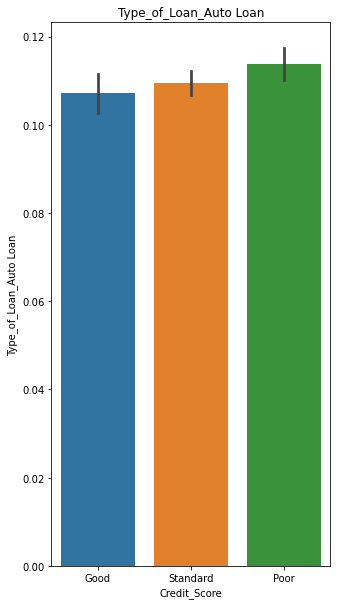

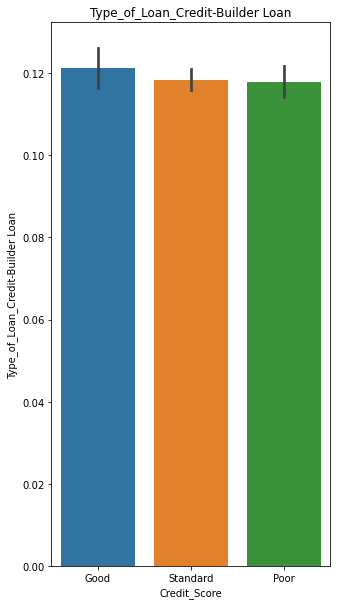

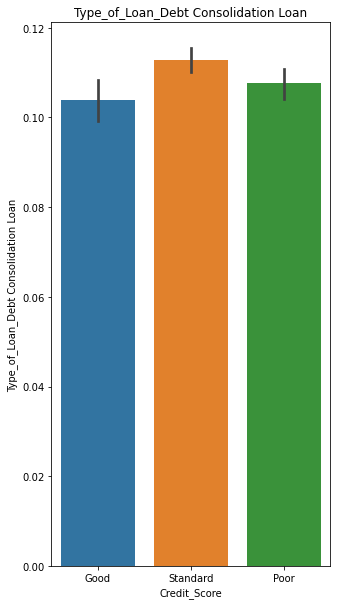

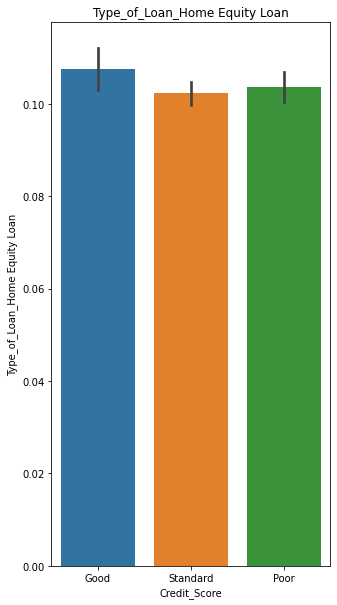

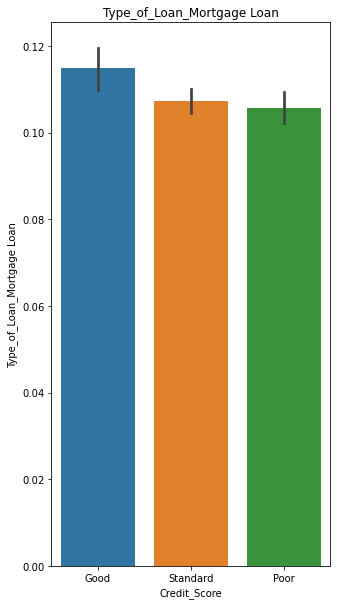

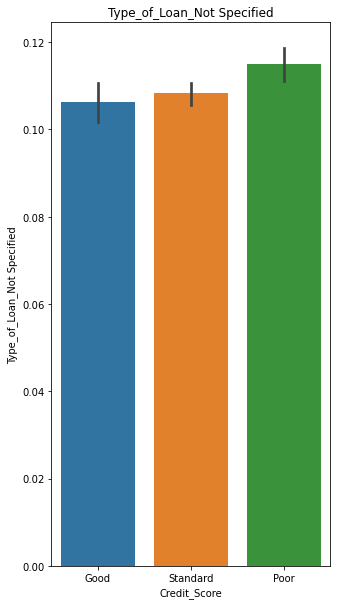

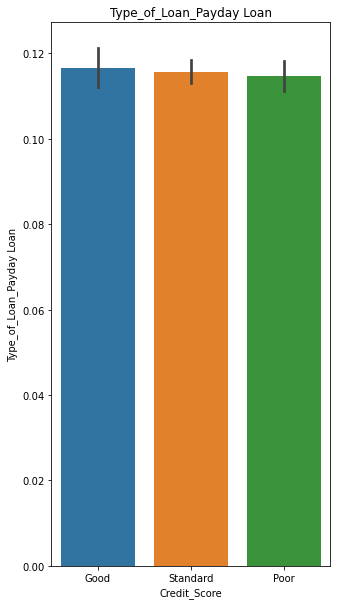

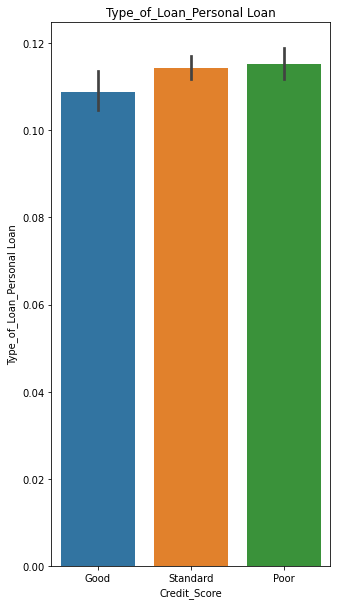

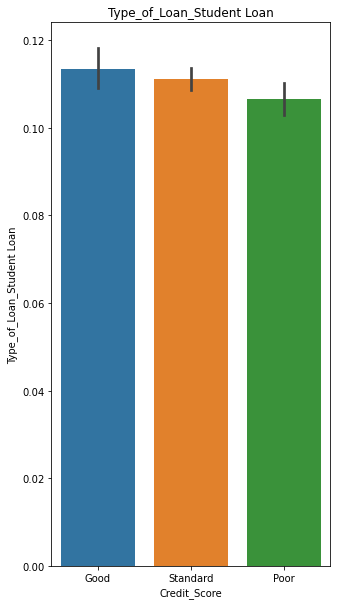

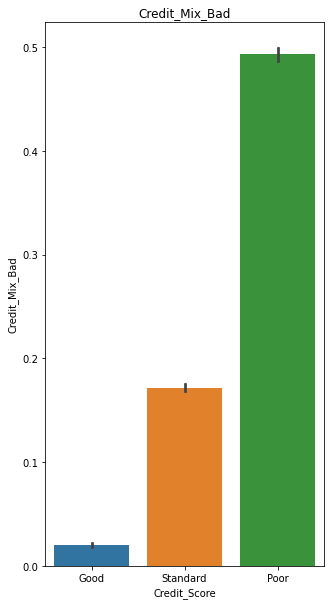

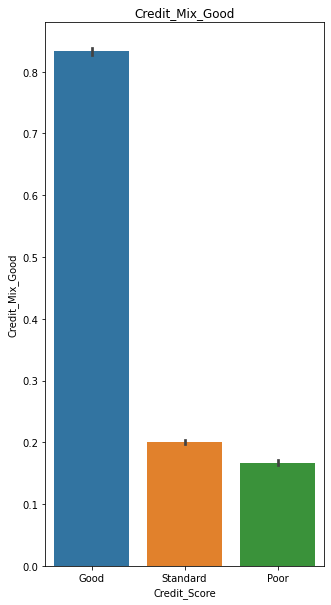

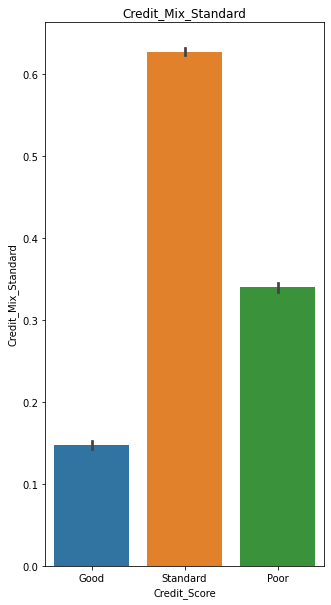

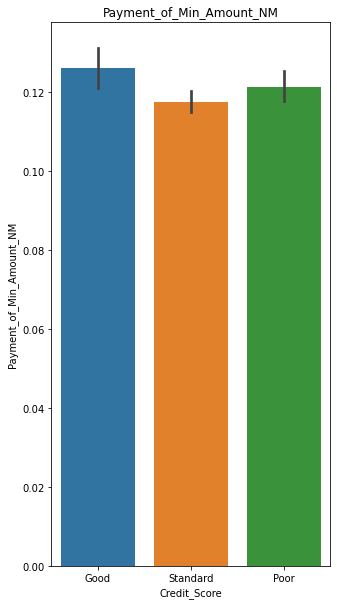

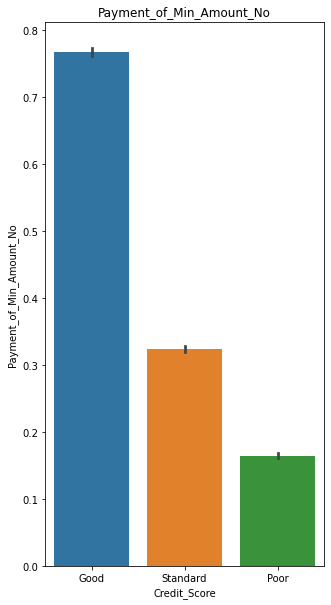

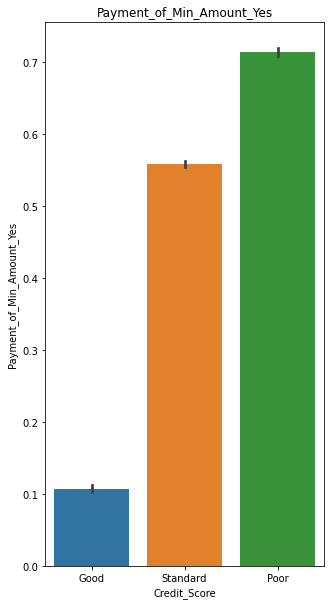

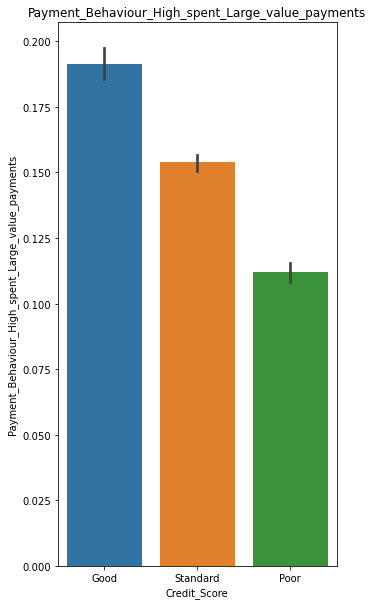

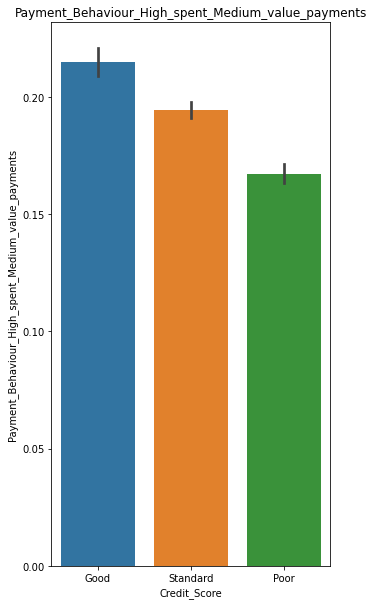

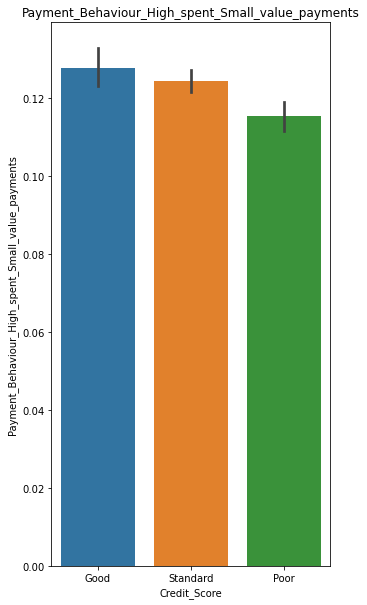

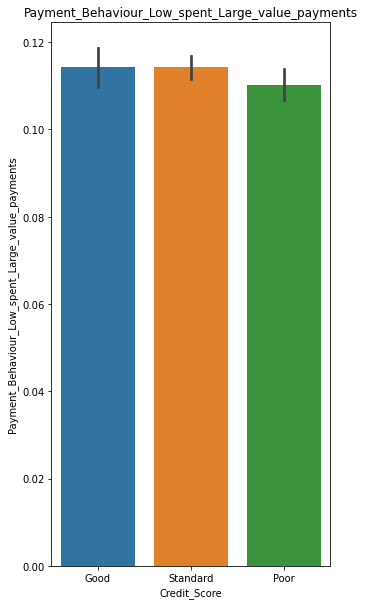

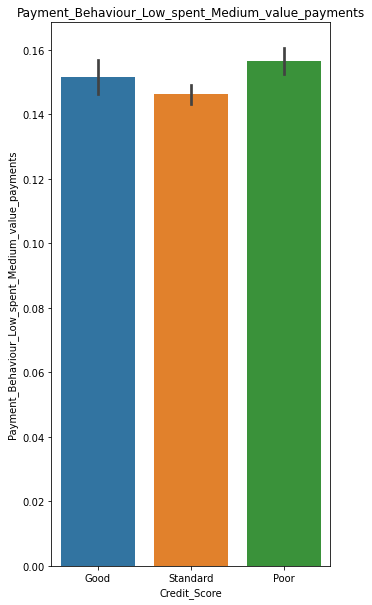

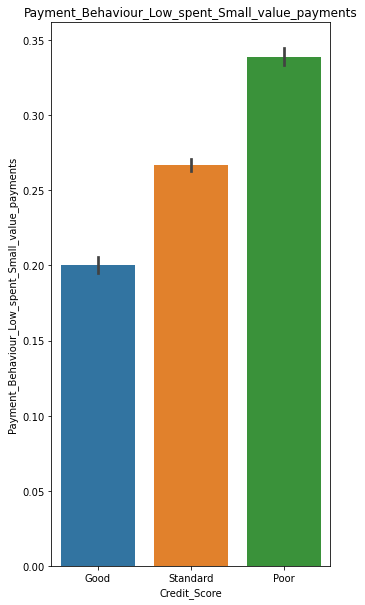

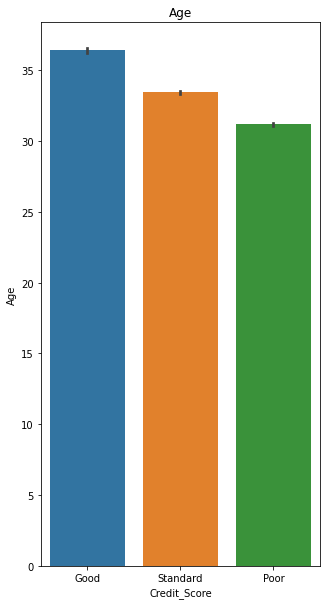

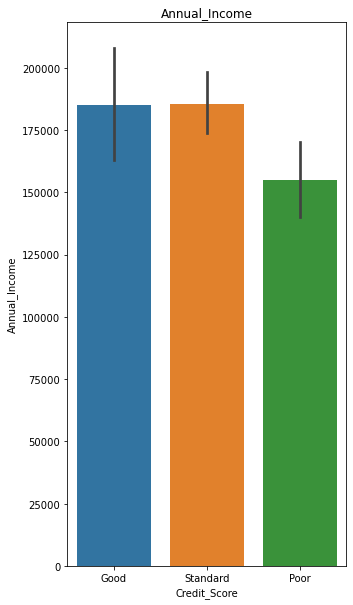

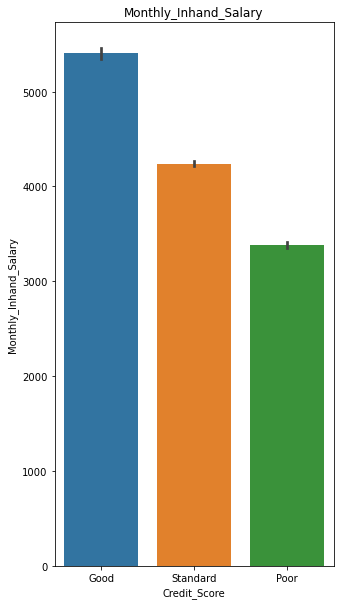

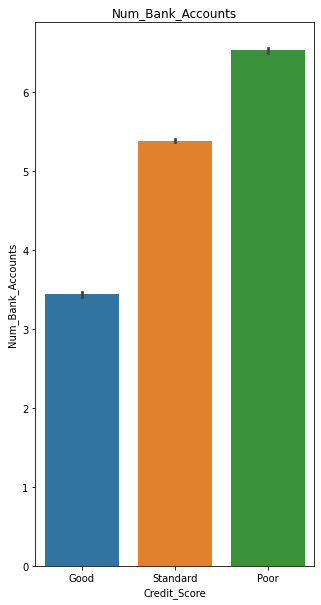

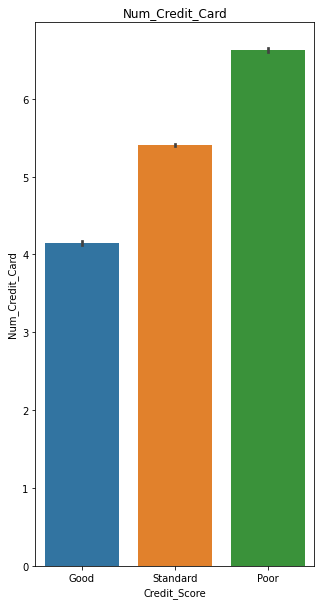

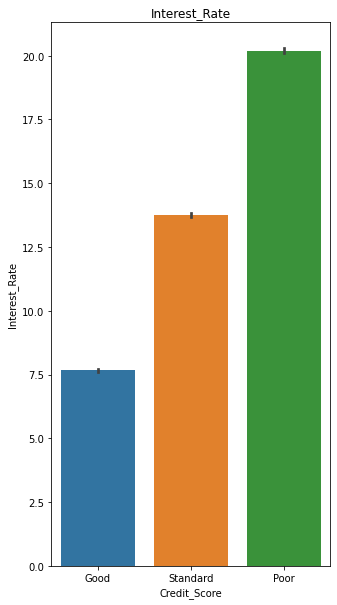

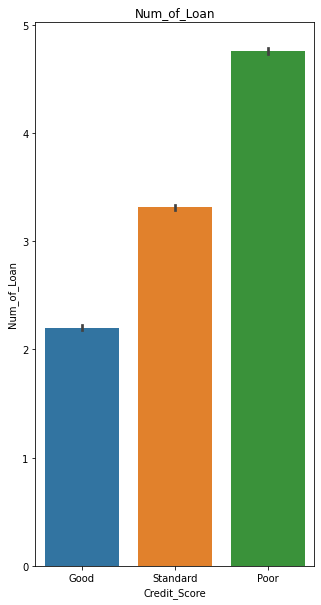

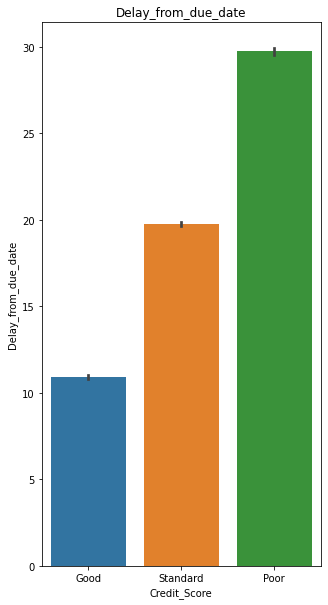

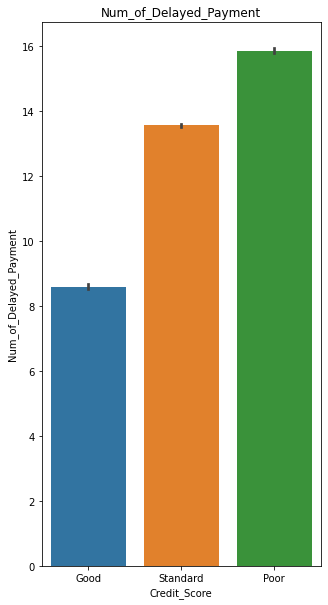

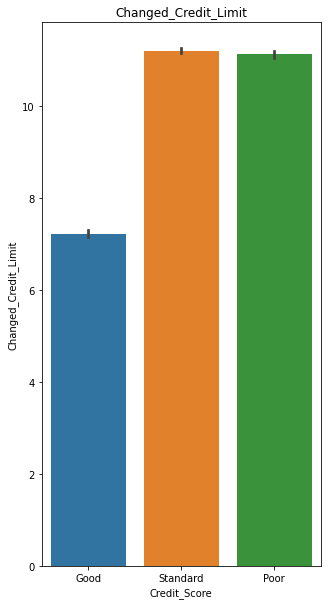

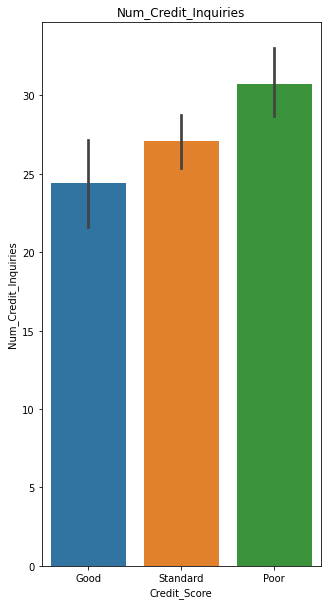

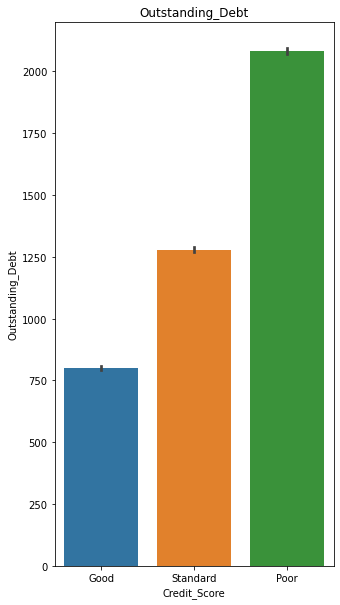

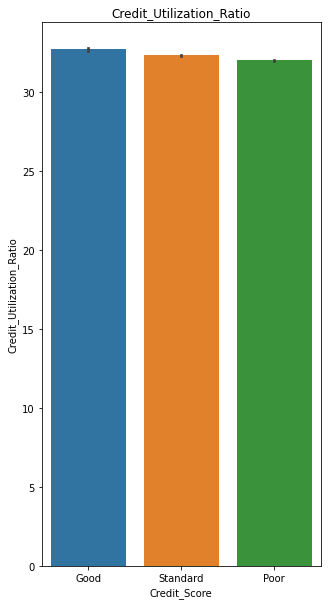

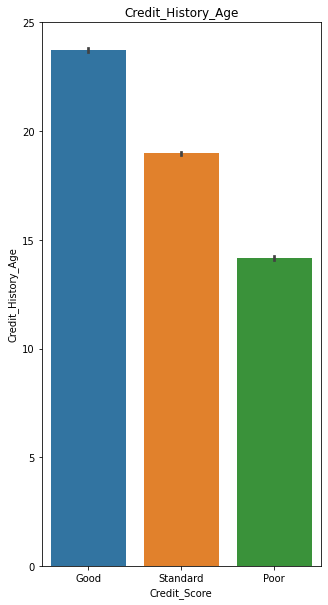

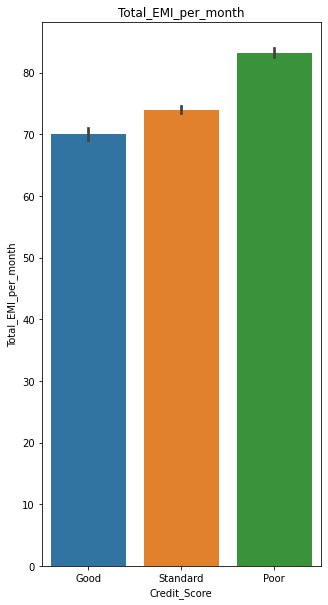

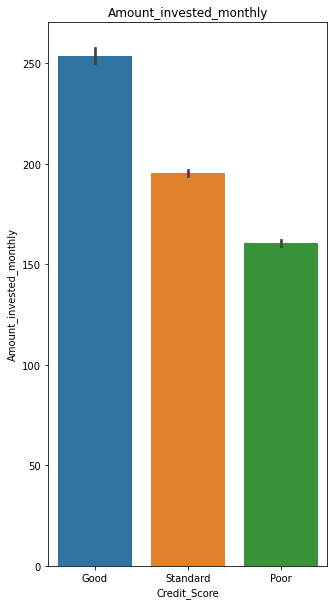

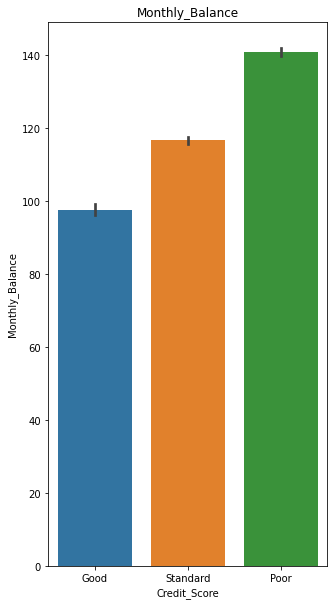

In [90]:
for i in dummy.drop(columns=['Credit_Score_Good','Credit_Score_Poor', 
                             'Credit_Score_Standard','Credit_Score']).columns:
        plt.figure(figsize=(5,10))
        sns.barplot(data=dummy, x='Credit_Score', y=i)
        plt.title(i)
        plt.show()


# Model

## X & y / Train Test Split

In [52]:
X = df.drop(columns=['Credit_Score', 'ID', 'Customer_ID', 'Month', 'Name', 'SSN','Occupation'])
y = df["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##  Preprocessing

In [55]:
# preprocessing for numerical columns
num_cols = make_column_selector(dtype_include="number")
num_trans = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

# preprocessing for categorical cols
cat_cols = make_column_selector(dtype_include="O")
cat_trans = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"),
                         OneHotEncoder(drop="first"))

preprocessor = make_column_transformer((num_trans, num_cols), (cat_trans, cat_cols))

## Select model

In [56]:
# Testing different models 
classifiers = [
            LogisticRegression(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            KNeighborsClassifier()
                ]

for clf in classifiers:
    pipe = make_pipeline(preprocessor, clf)
    grid = GridSearchCV(
                        pipe, cv=5, scoring="accuracy", param_grid={}, n_jobs=-1)
    grid.fit(X_train, y_train)
    score= grid.best_score_
    print(f"Classifier {clf} scored {score}\n")

Classifier LogisticRegression() scored 0.65748

Classifier DecisionTreeClassifier() scored 0.7204933333333333

Classifier RandomForestClassifier() scored 0.80256

Classifier KNeighborsClassifier() scored 0.7436800000000001



## Select columns

In [58]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [57]:
col_lst = [
            'Annual_Income',
            'Monthly_Inhand_Salary',
            'Num_Bank_Accounts',
            'Num_Credit_Card',
            'Interest_Rate',
            'Num_of_Loan',
            'Type_of_Loan',
            'Delay_from_due_date',
            'Num_of_Delayed_Payment',
            'Changed_Credit_Limit',
            'Num_Credit_Inquiries',
            'Credit_Mix',
            'Outstanding_Debt',
            'Credit_Utilization_Ratio',
            'Credit_History_Age',
            'Payment_of_Min_Amount',
            'Total_EMI_per_month',
            'Amount_invested_monthly',
            'Payment_Behaviour',
            'Monthly_Balance',
          ]

In [ ]:
rf_best_score = 0
rf_col = []

for i in range(20):
    for col in col_lst:
        X = df[rf_col+[col]]
        y = df["Credit_Score"]

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

        #params_rf = {"randomforestclassifier__n_estimators":[10,20,50,100,150,200],
                    #"randomforestclassifier__max_depth":[None,10, 25, 50, 75],
                    #"randomforestclassifier__min_samples_leaf":[10, 50, 100, 200],}

        clf = RandomForestClassifier(random_state=42)
        pipe = make_pipeline(preprocessor, clf)
        grid = GridSearchCV(pipe, cv=5, scoring="accuracy", param_grid={}, n_jobs=-1)
        grid.fit(X_train, y_train)
        score= grid.best_score_

        if rf_best_score < grid.best_score_:
            rf_best_score = grid.best_score_
            rf_best_col = col
            
        else:
            pass
    if rf_best_col not in rf_col:
        rf_col.append(rf_best_col)
        col_lst.remove(rf_best_col)
    else:
        pass


print(f"\nCol: {rf_col}\n\nBest Score: {rf_best_score}\n")

## Hyperparameter Tuning

In [ ]:
X = df[['Outstanding_Debt', 'Credit_Mix', 'Monthly_Inhand_Salary', 'Credit_History_Age', 
        'Interest_Rate', 'Num_Credit_Card']]
y = df["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

params_rf = {
            "randomforestclassifier__n_estimators":[10,20,50,100,150,200],
            "randomforestclassifier__max_depth":[None,10, 25, 50, 75],
            "randomforestclassifier__min_samples_leaf":[10, 50, 100, 200],  
            }

clf = RandomForestClassifier()
pipe = make_pipeline(preprocessor, clf)
grid = GridSearchCV(
                    pipe, cv=5, scoring="accuracy", param_grid=params_rf, n_jobs=-1)

grid.fit(X_train, y_train)
score= grid.best_score_
print(f"Best Score: {grid.best_score_}\nBest param: {grid.best_params_}")

# Final  Model

In [63]:
X = df[['Outstanding_Debt', 'Credit_Mix', 'Monthly_Inhand_Salary', 'Credit_History_Age', 
        'Interest_Rate', 'Num_Credit_Card']]
y = df["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

params_rf = {
            "randomforestclassifier__n_estimators":[100],
            "randomforestclassifier__max_depth":[None],
            "randomforestclassifier__min_samples_leaf":[10],  
            }

clf = RandomForestClassifier()
pipe = make_pipeline(preprocessor, clf)
grid = GridSearchCV(
                    pipe, cv=10, scoring="accuracy", param_grid=params_rf, n_jobs=-1)

grid.fit(X_train, y_train)
grid.best_score_

0.7875733333333332

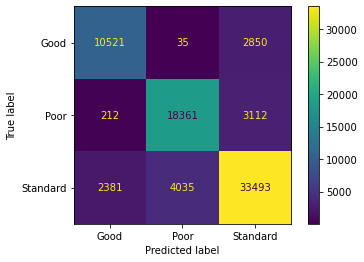

In [64]:
precisions = grid.predict(X_train)
cm = confusion_matrix(y_train, precisions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()
plt.show()

## Evaluate

In [65]:
baseline = df.Credit_Score.value_counts(normalize=True)[0]
baseline

0.53174

In [66]:
y_pred = grid.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

In [67]:
print(f"Test score: {round(test_score*100, 3)}" )
print(f"Baseline scoer: {round(baseline*100, 3)}" )

Test score: 79.376
Baseline scoer: 53.174


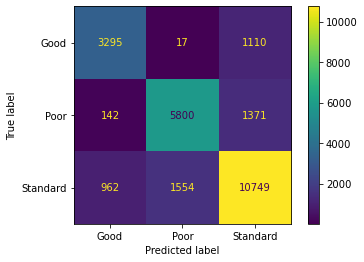

In [68]:
precisions = grid.predict(X_test)
cm = confusion_matrix(y_test, precisions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()
plt.show()